01. Import Data and Libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
%matplotlib inline

In [4]:
path = r'/Users/kevinclancy/Desktop/NFL'

In [5]:
spreads = pd.read_csv(os.path.join(path, '02 Data', 'cleaned data', 'NFL_Spreads_updated.csv'))

In [6]:
pd.set_option('display.max_columns', None)

02. Data Cleaning

In [8]:
# rename home_favorite column 0 = away favorite 1 = home favorite 
spreads.rename(columns={'home_favorite':'favorite', 'weather_temperature':'weather_temp'}, inplace = True)

In [9]:
# drop away_favorite column, game_date, and precipitation columns
spreads.drop(columns=['away_favorite', 'game_date', 'precipitation'], inplace = True)

In [10]:
# define winner and loser to represent which team won the game using team_id
def winner(row):
    if row['score_home'] > row['score_away']:
        return row['team_home']
    elif row['score_away'] > row['score_home']:
        return row['team_away']
    else:
        return 'Tie'

def loser(row):
    if row['score_home'] < row['score_away']:
        return row['team_home']
    elif row['score_away'] < row['score_home']:
        return row['team_away']
    else:
        return 'Tie'

In [11]:
# apply the defined functions to create new columns on spreads
spreads['winner'] = spreads.apply(winner, axis=1)
spreads['loser'] = spreads.apply(loser, axis=1)

In [12]:
spreads.head()

,Unnamed: 0,season,week,day_of_week,time_of_game,primetime,playoff_game,team_home,score_home,score_away,team_away,team_favored_id,point_spread,total_line,stadium,game_location,stadium_capacity,stadium_latitude,stadium_longitude,stadium_elevation,stadium_neutral,weather_temp,wind_mph,indoor,point_differential,total_points_scored,favorite,total_result,result,cover_result,team_favored_id_int,spread_category,winner,loser
0,0,2016,1,3,8:30 PM,1,0,DEN,21,20,CAR,CAR,-3.0,40.5,Empower Field at Mile High,"Denver, Colorado","76,125",39.743889,-105.020000,5280.0,0,82,2,0,1,41,0,1,1,1,5,Low Spread,DEN,CAR
1,1,2016,1,6,8:30 PM,1,0,ARI,21,23,NE,ARI,-8.5,44.0,State Farm Stadium,"Glendale, Arizona","63,400",33.528000,-112.263000,1068.0,0,72,0,1,-2,44,1,2,0,0,1,High Spread,NE,ARI
2,2,2016,1,6,1:00 PM,0,0,ATL,24,31,TB,ATL,-2.5,47.0,Mercedes-Benz Stadium,"Atlanta, Georgia",71000,33.755556,-84.400000,1050.0,0,72,0,1,-7,55,1,1,0,0,2,Low Spread,TB,ATL
3,3,2016,1,6,1:00 PM,0,0,BAL,13,7,BUF,BAL,-3.0,44.5,M&T Bank Stadium,"Baltimore, Maryland","71,008",39.278056,-76.622778,50.0,0,82,7,0,6,20,1,0,1,1,3,Low Spread,BAL,BUF
4,4,2016,1,6,4:30 PM,0,0,DAL,19,20,NYG,NYG,-1.0,47.5,AT&T Stadium,"Arlington, Texas","80,000",32.747778,-97.092778,607.0,0,72,0,1,-1,39,0,0,0,2,24,Low Spread,NYG,DAL


In [13]:
# define team that covered the spread
def cover_id(row):
    favored_team = row['team_favored_id']
    spread = row['point_spread']
    
    if row['team_favored_id'] == row['team_home']:
        favored_score = row['score_home']
        underdog_score = row['score_away']
    else:
        favored_score = row['score_away']
        underdog_score = row['score_home']
        
    score_difference = favored_score - underdog_score
    
    if spread < 0:
        if score_difference > -spread:
            return favored_team
        elif score_difference < -spread:
            return row['team_away'] if row['team_favored_id'] == row['team_home'] else row['team_home']  
        else:
            return 'Push'

In [14]:
# apply the defined function to create new column on spreads
spreads['cover_id'] = spreads.apply(cover_id, axis=1)

In [15]:
spreads.head()

,Unnamed: 0,season,week,day_of_week,time_of_game,primetime,playoff_game,team_home,score_home,score_away,team_away,team_favored_id,point_spread,total_line,stadium,game_location,stadium_capacity,stadium_latitude,stadium_longitude,stadium_elevation,stadium_neutral,weather_temp,wind_mph,indoor,point_differential,total_points_scored,favorite,total_result,result,cover_result,team_favored_id_int,spread_category,winner,loser,cover_id
0,0,2016,1,3,8:30 PM,1,0,DEN,21,20,CAR,CAR,-3.0,40.5,Empower Field at Mile High,"Denver, Colorado","76,125",39.743889,-105.020000,5280.0,0,82,2,0,1,41,0,1,1,1,5,Low Spread,DEN,CAR,DEN
1,1,2016,1,6,8:30 PM,1,0,ARI,21,23,NE,ARI,-8.5,44.0,State Farm Stadium,"Glendale, Arizona","63,400",33.528000,-112.263000,1068.0,0,72,0,1,-2,44,1,2,0,0,1,High Spread,NE,ARI,NE
2,2,2016,1,6,1:00 PM,0,0,ATL,24,31,TB,ATL,-2.5,47.0,Mercedes-Benz Stadium,"Atlanta, Georgia",71000,33.755556,-84.400000,1050.0,0,72,0,1,-7,55,1,1,0,0,2,Low Spread,TB,ATL,TB
3,3,2016,1,6,1:00 PM,0,0,BAL,13,7,BUF,BAL,-3.0,44.5,M&T Bank Stadium,"Baltimore, Maryland","71,008",39.278056,-76.622778,50.0,0,82,7,0,6,20,1,0,1,1,3,Low Spread,BAL,BUF,BAL
4,4,2016,1,6,4:30 PM,0,0,DAL,19,20,NYG,NYG,-1.0,47.5,AT&T Stadium,"Arlington, Texas","80,000",32.747778,-97.092778,607.0,0,72,0,1,-1,39,0,0,0,2,24,Low Spread,NYG,DAL,Push


In [16]:
spreads['winner'].value_counts()

winner
KC     112
NE      87
BUF     85
BAL     85
DAL     84
NO      84
GB      84
PIT     83
PHI     82
LAR     81
SEA     79
MIN     76
TEN     75
SF      74
TB      73
MIA     67
IND     63
ATL     63
LAC     63
CIN     61
LVR     61
DET     58
HOU     58
CHI     52
DEN     52
CLE     52
WAS     51
ARI     50
JAX     49
NYG     49
CAR     48
NYJ     41
Tie      9
Name: count, dtype: int64

In [17]:
spreads['loser'].value_counts()

loser
NYJ    90
JAX    87
CAR    84
NYG    84
CLE    81
CHI    81
ARI    80
HOU    79
DEN    79
WAS    79
DET    75
CIN    74
ATL    73
LVR    72
LAC    71
IND    70
SF     69
TB     67
MIA    67
TEN    63
LAR    61
PHI    59
MIN    59
SEA    58
GB     56
BUF    56
NE     55
NO     54
DAL    54
PIT    53
BAL    53
KC     39
Tie     9
Name: count, dtype: int64

In [18]:
spreads['cover_id'].value_counts()

cover_id
KC      83
NE      77
GB      76
CIN     74
DAL     74
NO      73
MIA     71
PIT     71
DET     71
BAL     70
LAR     70
SF      69
BUF     69
Push    68
TEN     68
PHI     68
MIN     67
TB      67
NYG     66
IND     65
SEA     65
LVR     64
LAC     62
WAS     62
ATL     61
JAX     61
ARI     61
HOU     60
DEN     58
CHI     57
CAR     55
CLE     53
NYJ     52
Name: count, dtype: int64

In [19]:
wins = spreads['winner'].value_counts()
losses = spreads['loser'].value_counts()
spread_cover = spreads['cover_id'].value_counts()

# create df with wins, losses, and spread_cover counts
team_performance = pd.DataFrame({'wins': wins, 'losses': losses, 'spread_cover': spread_cover})

In [20]:
# add and calculate columns total_games, win_percentage, and cover_percentage
team_performance['total_games'] = team_performance['wins'] + team_performance['losses']
team_performance['win_percentage'] = (team_performance['wins'] / team_performance['total_games']) * 100
team_performance['cover_percentage'] = (team_performance['spread_cover'] / team_performance['total_games']) * 100

In [21]:
pd.set_option('display.max_rows', None)

In [22]:
print(team_performance)

       wins  losses  spread_cover  total_games  win_percentage  \
ARI    50.0    80.0          61.0        130.0       38.461538   
ATL    63.0    73.0          61.0        136.0       46.323529   
BAL    85.0    53.0          70.0        138.0       61.594203   
BUF    85.0    56.0          69.0        141.0       60.283688   
CAR    48.0    84.0          55.0        132.0       36.363636   
CHI    52.0    81.0          57.0        133.0       39.097744   
CIN    61.0    74.0          74.0        135.0       45.185185   
CLE    52.0    81.0          53.0        133.0       39.097744   
DAL    84.0    54.0          74.0        138.0       60.869565   
DEN    52.0    79.0          58.0        131.0       39.694656   
DET    58.0    75.0          71.0        133.0       43.609023   
GB     84.0    56.0          76.0        140.0       60.000000   
HOU    58.0    79.0          60.0        137.0       42.335766   
IND    63.0    70.0          65.0        133.0       47.368421   
JAX    49.

In [23]:
# sort by cover_percentage
team_performance.sort_values(by = 'cover_percentage')

,wins,losses,spread_cover,total_games,win_percentage,cover_percentage
NYJ,41.0,90.0,52.0,131.0,31.297710,39.694656
CLE,52.0,81.0,53.0,133.0,39.097744,39.849624
CAR,48.0,84.0,55.0,132.0,36.363636,41.666667
CHI,52.0,81.0,57.0,133.0,39.097744,42.857143
HOU,58.0,79.0,60.0,137.0,42.335766,43.795620
DEN,52.0,79.0,58.0,131.0,39.694656,44.274809
ATL,63.0,73.0,61.0,136.0,46.323529,44.852941
JAX,49.0,87.0,61.0,136.0,36.029412,44.852941
LAC,63.0,71.0,62.0,134.0,47.014925,46.268657
ARI,50.0,80.0,61.0,130.0,38.461538,46.923077


In [24]:
# check for missing values 
spreads.isnull().sum()

Unnamed: 0             0
season                 0
week                   0
day_of_week            0
time_of_game           0
primetime              0
playoff_game           0
team_home              0
score_home             0
score_away             0
team_away              0
team_favored_id        0
point_spread           0
total_line             0
stadium                0
game_location          0
stadium_capacity       0
stadium_latitude       0
stadium_longitude      0
stadium_elevation      9
stadium_neutral        0
weather_temp           0
wind_mph               0
indoor                 0
point_differential     0
total_points_scored    0
favorite               0
total_result           0
result                 0
cover_result           0
team_favored_id_int    0
spread_category        0
winner                 0
loser                  0
cover_id               3
dtype: int64

In [25]:
# check for duplicates
dups = spreads.duplicated()

In [26]:
dups.shape

(2191,)

03. Data Prep

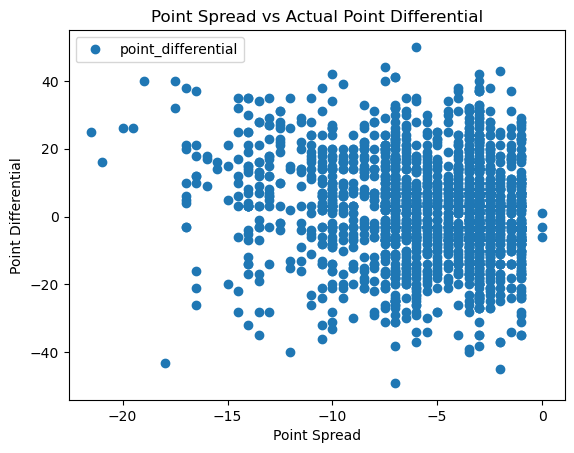

In [28]:
spreads.plot(x = 'point_spread', y = 'point_differential',style='o')
plt.title('Point Spread vs Actual Point Differential')  
plt.xlabel('Point Spread')  
plt.ylabel('Point Differential')  
plt.show()

Hypothesis: If the point spread set by oddsmakers is an accurate prediction, then the actual point differential will reflect that

In [30]:
# reshape variables into NumPy arrays and put them in separate objects
X = spreads['point_spread'].values.reshape(-1,1)
y = spreads['point_differential'].values.reshape(-1,1)

In [31]:
X

array([[-3. ],
       [-8.5],
       [-2.5],
       ...,
       [-4.5],
       [-7.5],
       [-2. ]])

In [32]:
y

array([[ 1],
       [-2],
       [-7],
       ...,
       [-7],
       [ 3],
       [ 3]])

In [33]:
# split the data into a training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

04. Regression Analysis

In [35]:
# create regression object
regression = LinearRegression()

In [36]:
# fit regression object on the training set
regression.fit(X_train, y_train)

LinearRegression()

In [37]:
# predict the values of y using X
y_predicted = regression.predict(X_test)

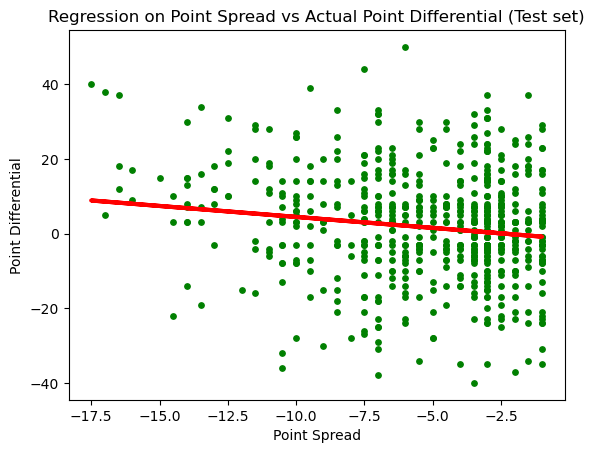

In [38]:
# Create a plot that shows the regression line from the model on the test set.
plot_test = plt
plot_test.scatter(X_test, y_test, color='green', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Regression on Point Spread vs Actual Point Differential (Test set)')
plot_test.xlabel('Point Spread')
plot_test.ylabel('Point Differential')
plot_test.show()

In [39]:
# calculate summary statistics 
rmse = mean_squared_error(y_test, y_predicted)
r2 = r2_score(y_test, y_predicted)

In [40]:
# print summary statistics
print(f'Slope:{regression.coef_}')
print(f'Mean Squared Error:{rmse}')
print(f'R2 Score:{r2}')

Slope:[[-0.58756626]]
Mean Squared Error:197.5817154740313
R2 Score:0.024574171552872004


In [41]:
# create df to compare actual and predicted values of y
total_df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
total_df.head(15)

,Actual,Predicted
0,-2,-0.234771
1,1,0.352795
2,-3,0.352795
3,20,4.465759
4,-10,1.821711
5,-3,-0.822338
6,-14,0.352795
7,-3,4.759542
8,-36,4.759542
9,-4,0.059012


In [42]:
# Predict
y_predicted_train = regression.predict(X_train)

In [43]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [44]:
print(f'Slope:{regression.coef_}')
print(f'Mean Squared Error:{rmse}')
print(f'R2 Score:{r2}')

Slope:[[-0.58756626]]
Mean Squared Error:193.8565363537382
R2 Score:0.021447214163455297


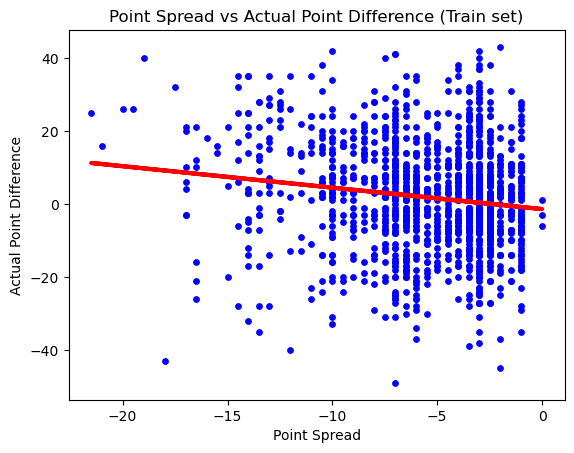

In [45]:
# visualize training set results
plot_test = plt
plot_test.scatter(X_train, y_train, color='blue', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('Point Spread vs Actual Point Difference (Train set)')
plot_test.xlabel('Point Spread')
plot_test.ylabel('Actual Point Difference')
plot_test.show()

05. Interpretation/Thoughts

The results of the model indicates that the hypothesis does not hold. Point Spreads set by oddsmakers do not accurately predict the actual point differential. The incredibly high RMSE tells me that the model is frequently inaccurate. Along with the RMSE, we can look at the R2 score which explains the variance. With a value of .02, we can determine that point spread is not an accurate way to determine the actual outcome of a game. There are alot of variables in a football game that can impact the overall result.

In [47]:
team_performance.head()

,wins,losses,spread_cover,total_games,win_percentage,cover_percentage
ARI,50.0,80.0,61.0,130.0,38.461538,46.923077
ATL,63.0,73.0,61.0,136.0,46.323529,44.852941
BAL,85.0,53.0,70.0,138.0,61.594203,50.724638
BUF,85.0,56.0,69.0,141.0,60.283688,48.936170
CAR,48.0,84.0,55.0,132.0,36.363636,41.666667


In [49]:
spreads.to_csv(os.path.join(path,'02 Data', 'cleaned data', 'NFL_spreads_update4.csv'))